In [30]:
if (!require("BiocManager", quietly = TRUE))
    install.packages("BiocManager")
BiocManager::install()
library(tidyverse)

'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.r-project.org

Bioconductor version 3.17 (BiocManager 1.30.22), R 4.3.0 (2023-04-21)

Old packages: 'GenomeInfoDb', 'KEGGREST', 'markdown', 'scuttle', 'seriation'



In [22]:
# Task 4
## 1. Use the R internal CO2 dataset (“data(CO2)”).
data("CO2")

In [23]:
## 2. Describe briefly the content of the CO2 dataset using the help function.
help(CO2)

CO2 {datasets},R Documentation


In [27]:
## 3. What is the average and median CO2 uptake of the plants from Quebec and Mississippi?
CO2_uptake=CO2 %>% ungroup() %>% group_by(Type)%>%
  summarise(average_uptake=mean(uptake),
            median_uptake=median(uptake)) %>% ungroup()
CO2_uptake

Type,average_uptake,median_uptake
<fct>,<dbl>,<dbl>
Quebec,33.54286,37.15
Mississippi,20.88333,19.30


In [31]:
## 4. [Optional] In the “airway” example data from Bioconductor, how many genes are expressed in each sample? How many genes are not expressed in any sample?
BiocManager::install("airway")

'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.r-project.org

Bioconductor version 3.17 (BiocManager 1.30.22), R 4.3.0 (2023-04-21)

Installing package(s) 'airway'

installing the source package ‘airway’


Old packages: 'GenomeInfoDb', 'KEGGREST', 'markdown', 'scuttle', 'seriation'



In [34]:
library(airway)
data(airway)

In [51]:
data("airway")
head(assay(airway))
colData(airway)
rowRanges(airway)

,SRR1039508,SRR1039509,SRR1039512,SRR1039513,SRR1039516,SRR1039517,SRR1039520,SRR1039521
ENSG00000000003,679,448,873,408,1138,1047,770,572
ENSG00000000005,0,0,0,0,0,0,0,0
ENSG00000000419,467,515,621,365,587,799,417,508
ENSG00000000457,260,211,263,164,245,331,233,229
ENSG00000000460,60,55,40,35,78,63,76,60
ENSG00000000938,0,0,2,0,1,0,0,0


DataFrame with 8 rows and 9 columns
           SampleName     cell      dex    albut        Run avgLength
             <factor> <factor> <factor> <factor>   <factor> <integer>
SRR1039508 GSM1275862  N61311     untrt    untrt SRR1039508       126
SRR1039509 GSM1275863  N61311     trt      untrt SRR1039509       126
SRR1039512 GSM1275866  N052611    untrt    untrt SRR1039512       126
SRR1039513 GSM1275867  N052611    trt      untrt SRR1039513        87
SRR1039516 GSM1275870  N080611    untrt    untrt SRR1039516       120
SRR1039517 GSM1275871  N080611    trt      untrt SRR1039517       126
SRR1039520 GSM1275874  N061011    untrt    untrt SRR1039520       101
SRR1039521 GSM1275875  N061011    trt      untrt SRR1039521        98
           Experiment    Sample    BioSample
             <factor>  <factor>     <factor>
SRR1039508  SRX384345 SRS508568 SAMN02422669
SRR1039509  SRX384346 SRS508567 SAMN02422675
SRR1039512  SRX384349 SRS508571 SAMN02422678
SRR1039513  SRX384350 SRS508572 SAMN024

GRangesList object of length 63677:
$ENSG00000000003
GRanges object with 17 ranges and 2 metadata columns:
       seqnames            ranges strand |   exon_id       exon_name
          <Rle>         <IRanges>  <Rle> | <integer>     <character>
   [1]        X 99883667-99884983      - |    667145 ENSE00001459322
   [2]        X 99885756-99885863      - |    667146 ENSE00000868868
   [3]        X 99887482-99887565      - |    667147 ENSE00000401072
   [4]        X 99887538-99887565      - |    667148 ENSE00001849132
   [5]        X 99888402-99888536      - |    667149 ENSE00003554016
   ...      ...               ...    ... .       ...             ...
  [13]        X 99890555-99890743      - |    667156 ENSE00003512331
  [14]        X 99891188-99891686      - |    667158 ENSE00001886883
  [15]        X 99891605-99891803      - |    667159 ENSE00001855382
  [16]        X 99891790-99892101      - |    667160 ENSE00001863395
  [17]        X 99894942-99894988      - |    667161 ENSE00001828

In [56]:
genes_expressed <- colSums(assay(airway) != 0)
genes_expressed
genes_not_expressed <- sum(rowSums(assay(airway)) == 0)
genes_not_expressed

SRR1039508 SRR1039509 SRR1039512 SRR1039513 SRR1039516 SRR1039517 SRR1039520 
     24633      24527      25699      23124      25508      25998      24662 
SRR1039521 
     23991

[1] 30208

In [60]:
# Task 5
## 1. Write a function that calculates the ratio of the mean and the median of a given vector.
mean_to_median_ratio <- function(x){
    mean(x)/median(x)
}
print(mean_to_median_ratio(CO2$uptake))

[1] 0.9615935


In [61]:
## 2. Write a function that ignores the lowest and the highest value from a given vector and calculate the mean.
mean_without_max_min <- function(x){
    y <- x[-c(which.min(x),which.max(x))]
    mean(y)
}
print(mean_without_max_min(CO2$uptake))

[1] 27.22805


In [68]:
## 3. Write a short (max. 300 characters, no spaces) explanation of why, how, and when not to use pipes.
print("Pipes express a sequence of multiple operations in a clear way.
You can pipe by using (%>%, %T%, %$%, %<>%).
You shouldn't use pipes:
1. If operations are longer than ten steps
2. If there are multiple inputs or outputs
3. If you are think about a directed graph with a complex dependency structure") 

[1] "Pipes express a sequence of multiple operations in a clear way.\nYou can pipe by using (%>%, %T%, %$%, %<>%).\nYou shouldn't use pipes:\n1. If operations are longer than ten steps\n2. If there are multiple inputs or outputs\n3. If you are think about a directed graph with a complex dependency structure"


In [72]:
## 4. Write a short explanation (max. 300 characters, no spaces) of why they could be useful in your work.
print("The apply functions can:
1. Allow crossing the data and avoid explicit use of loop constructs.
2. Implement the Split-Apply-Combine strategy for data analysis.
3. Be more efficient than using for loops in some cases.
4. Make a more generic function that can be used in more places.")

[1] "The apply functions can:\n1. Allow crossing the data and avoid explicit use of loop constructs.\n2. Implement the Split-Apply-Combine strategy for data analysis.\n3. Be more efficient than using for loops in some cases.\n4. Make a more generic function that can be used in more places."


In [79]:
# Task 6
library(remotes)
install_url("http://emotion.utu.fi/wp-content/uploads/2019/11/nummenmaa_1.0.tar.gz",dependencies=TRUE)

TTR          (NA -> 0.24.3 ) [CRAN]
xts          (NA -> 0.13.1 ) [CRAN]
mathjaxr     (NA -> 1.6-0  ) [CRAN]
visNetwork   (NA -> 2.1.2  ) [CRAN]
downloader   (NA -> 0.4    ) [CRAN]
pbivnorm     (NA -> 0.6.0  ) [CRAN]
quantmod     (NA -> 0.4.25 ) [CRAN]
estimability (NA -> 1.4.1  ) [CRAN]
leaps        (NA -> 3.1    ) [CRAN]
flashClust   (NA -> 1.01-2 ) [CRAN]
emmeans      (NA -> 1.8.8  ) [CRAN]
benchmark... (NA -> 1.0.4  ) [CRAN]
memuse       (NA -> 4.2-3  ) [CRAN]
benchmarkme  (NA -> 1.0.8  ) [CRAN]
twosamples   (NA -> 2.0.1  ) [CRAN]
pracma       (NA -> 2.4.2  ) [CRAN]
qqconf       (NA -> 1.3.2  ) [CRAN]
opdisDown... (NA -> 0.8.2  ) [CRAN]
tiff         (NA -> 0.1-11 ) [CRAN]
metadat      (NA -> 1.2-0  ) [CRAN]
DiagrammeR   (NA -> 1.0.10 ) [CRAN]
lavaan       (NA -> 0.6-16 ) [CRAN]
svglite      (NA -> 2.1.1  ) [CRAN]
urca         (NA -> 1.3-3  ) [CRAN]
tseries      (NA -> 0.10-54) [CRAN]
fracdiff     (NA -> 1.5-2  ) [CRAN]
FactoMineR   (NA -> 2.8    ) [CRAN]
qqplotr      (NA -> 0.0.6  )

Installing 38 packages: TTR, xts, mathjaxr, visNetwork, downloader, pbivnorm, quantmod, estimability, leaps, flashClust, emmeans, benchmarkmeData, memuse, benchmarkme, twosamples, pracma, qqconf, opdisDownsampling, tiff, metadat, DiagrammeR, lavaan, svglite, urca, tseries, fracdiff, FactoMineR, qqplotr, ppcor, OpenImageR, metafor, lavaanPlot, kableExtra, forecast, factoextra, ggthemes, ggResidpanel, CTT

Warning message in download.file(url, destfile, method, mode = "wb", ...):
“URL 'https://cran.r-project.org/bin/macosx/big-sur-arm64/contrib/4.3/TTR_0.24.3.tgz': Timeout of 60 seconds was reached”


Error in download.file(url, destfile, method, mode = "wb", ...) : 
  cannot open URL 'https://cran.r-project.org/bin/macosx/big-sur-arm64/contrib/4.3/TTR_0.24.3.tgz'


Warning message in download.packages(pkgs, destdir = tmpd, available = available, :
“download of package ‘TTR’ failed”



The downloaded binary packages are in
	/var/folders/fz/0tfmfwz96jx2c7w7rh454nbw0000gn/T//RtmpOibVu9/downloaded_packages
── R CMD build ─────────────────────────────────────────────────────────────────
* checking for file ‘/private/var/folders/fz/0tfmfwz96jx2c7w7rh454nbw0000gn/T/RtmpOibVu9/remotesf1e13ee4c0dc/nummenmaa/DESCRIPTION’ ... OK
* preparing ‘nummenmaa’:
* checking DESCRIPTION meta-information ... OK
* checking for LF line-endings in source and make files and shell scripts
* checking for empty or unneeded directories
* building ‘nummenmaa_1.0.tar.gz’



In [78]:
magic_guys <- read.csv("/Users/dzakaria/research/courses/RIKEN_KI_bioinformatic/magic_guys.csv")

In [90]:
head(magic_guys)

,uniqId,species,length,weight
,<chr>,<chr>,<dbl>,<dbl>
1,p1,jedi,174.6,71.3
2,p2,jedi,252.2,70.8
3,p3,jedi,229.8,70.7
4,p4,jedi,176.2,80.4
5,p5,jedi,213.3,82.0
6,p6,jedi,112.5,64.2


[1] "jedi" "jedi" "jedi" "jedi" "jedi" "jedi" "jedi" "jedi" "jedi" "jedi"
 [11] "jedi" "jedi" "jedi" "jedi" "jedi" "jedi" "jedi" "jedi" "jedi" "jedi"
 [21] "jedi" "jedi" "jedi" "jedi" "jedi" "jedi" "jedi" "jedi" "jedi" "jedi"
 [31] "jedi" "jedi" "jedi" "jedi" "jedi" "jedi" "jedi" "jedi" "jedi" "jedi"
 [41] "jedi" "jedi" "jedi" "jedi" "jedi" "jedi" "jedi" "jedi" "jedi" "jedi"
 [51] "sith" "sith" "sith" "sith" "sith" "sith" "sith" "sith" "sith" "sith"
 [61] "sith" "sith" "sith" "sith" "sith" "sith" "sith" "sith" "sith" "sith"
 [71] "sith" "sith" "sith" "sith" "sith" "sith" "sith" "sith" "sith" "sith"
 [81] "sith" "sith" "sith" "sith" "sith" "sith" "sith" "sith" "sith" "sith"
 [91] "sith" "sith" "sith" "sith" "sith" "sith" "sith" "sith" "sith" "sith"

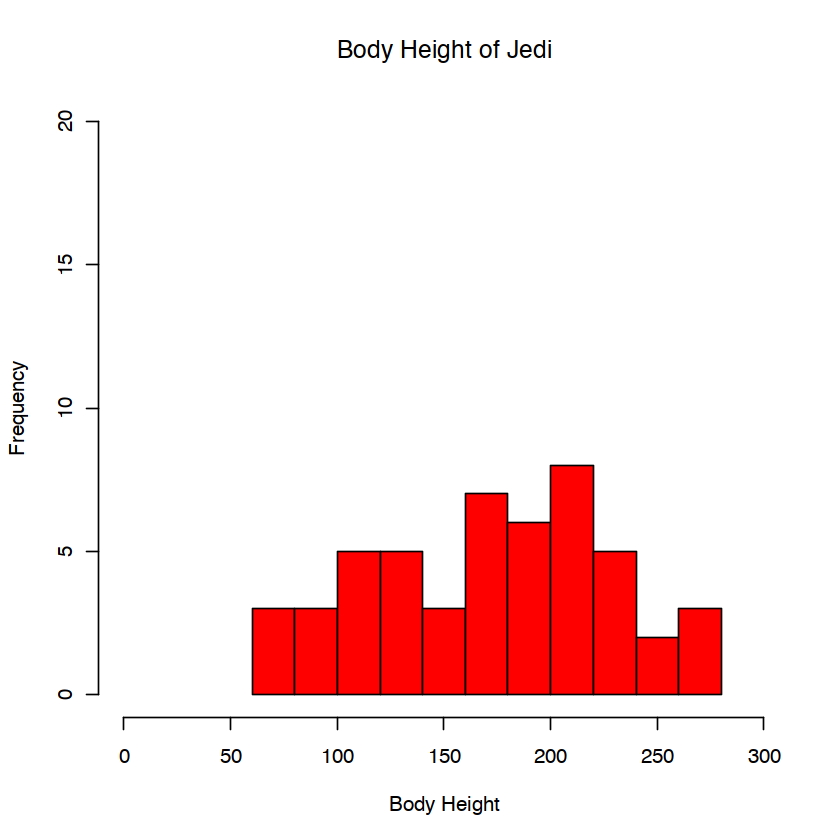

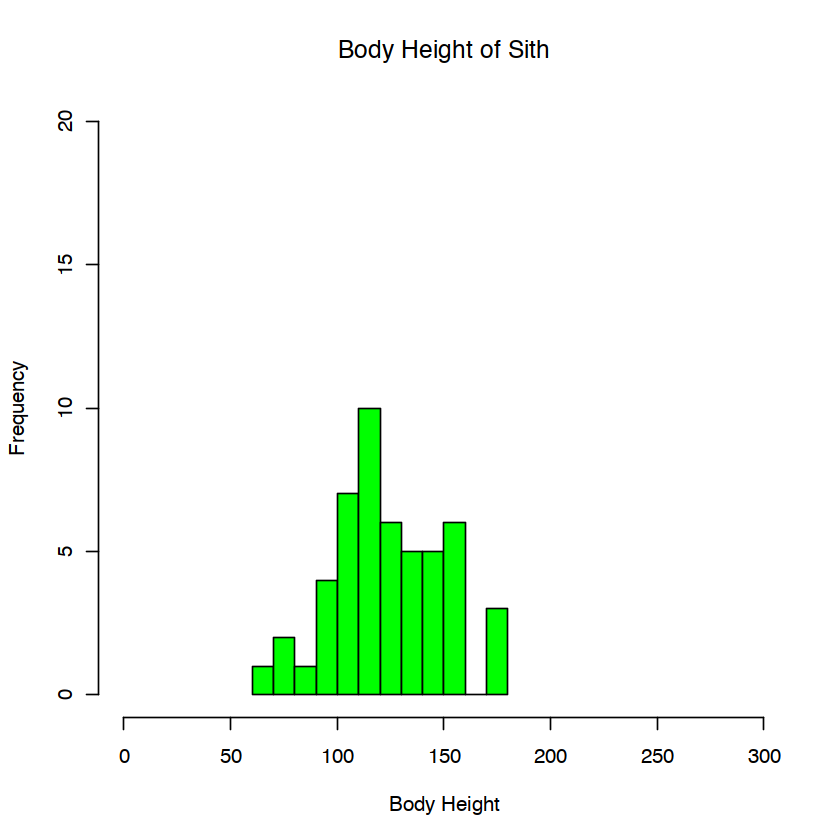

In [149]:
## 1. Compare the distributions of the body heights of the two species from the 'magic_guys.csv' dataset graphically
### a. using the basic 'hist' function as well as ‘ggplot’ and ‘geom_histogram’ functions from the ggplot2 package.
hist(magic_guys$length[magic_guys$species=="jedi"], col='red', breaks = 10, xlim = c(0,300), ylim = c(0,20), main = "Body Height of Jedi", xlab = "Body Height")
hist(magic_guys$length[magic_guys$species=="sith"], col='green', breaks = 10, xlim = c(0,300), ylim = c(0,20), main = "Body Height of Sith", xlab = "Body Height")

p = ggplot(magic_guys, aes(x=length, fill=species)) +
    geom_histogram(position="identity", colour="grey40", alpha=0.2, bins = 10) +
    facet_grid(. ~ species) +
    labs(x = "\nBody Height", y= "Frequency", title = "Body Height Distributions of Different Species") +
  theme(
    plot.margin = margin(1, 1, 1, 1, "cm"),
    axis.text.x = element_text(angle = 90, color = "black", size = 10),
    axis.text.y = element_text(color = "black", size = 10),
    axis.title = element_text(size = 25),
    legend.position = "none",
    legend.title = element_text(size = 20, hjust=0),
    legend.text = element_text(size = 15),
    strip.text.x = element_text(size = 15),
    plot.title = element_text(size = 20, hjust=0.5),
    panel.spacing = unit(2, "lines")) +
  guides(fill = guide_legend(nrow = 10)) + 
  facet_grid(cols = vars(species)) 
p

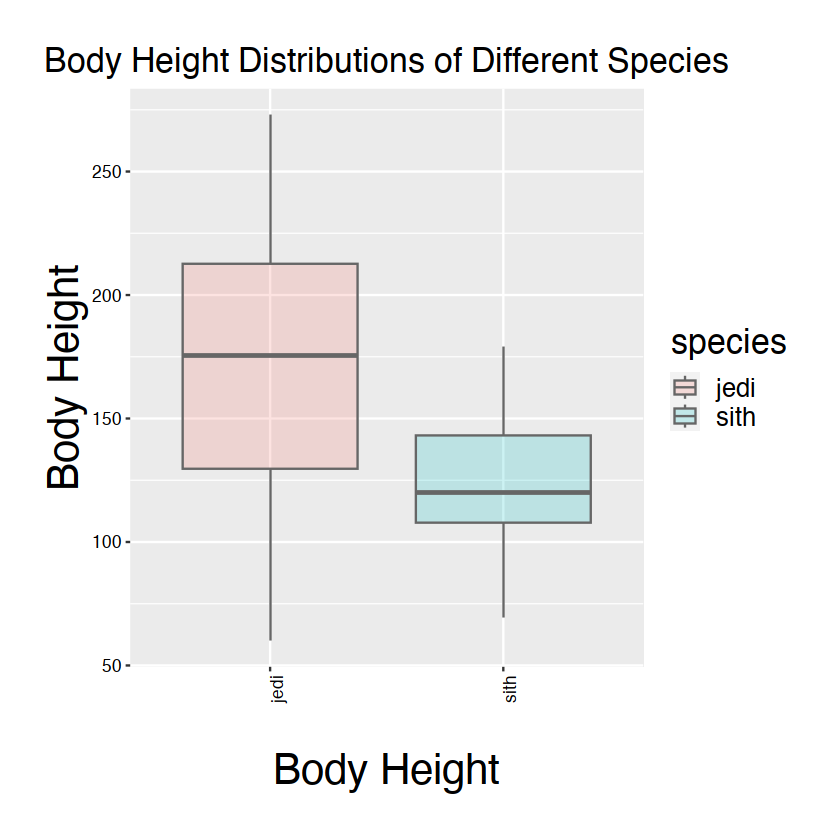

In [163]:
### b. Do the same comparison as in a. but with boxplots. If you want to use the ggplot2-package, use the functions ‘ggplot’ and ‘geom_boxplot’.
p2 = ggplot(magic_guys, aes(x=species, y=length, fill=species)) +
    geom_boxplot(colour="grey40", alpha=0.2) +
    labs(x = "\nBody Height", y= "Body Height", title = "Body Height Distributions of Different Species") +
  theme(
    plot.margin = margin(1, 1, 1, 1, "cm"),
    axis.text.x = element_text(angle = 90, color = "black", size = 10),
    axis.text.y = element_text(color = "black", size = 10),
    axis.title = element_text(size = 25),
    legend.position = "right",
    legend.title = element_text(size = 20, hjust=0),
    legend.text = element_text(size = 15),
    strip.text.x = element_text(size = 15),
    plot.title = element_text(size = 20, hjust=0.5),
    panel.spacing = unit(2, "lines")) 
p2

In [164]:
### c. Save the plots with the ‘png’, ‘pdf’, and ‘svg’ formats. In which situation would you use which file format?
ggsave("/Users/dzakaria/research/courses/RIKEN_KI_bioinformatic/magic_guys_length.species.geom_histogram.png", p)
ggsave("/Users/dzakaria/research/courses/RIKEN_KI_bioinformatic/magic_guys_length.species.geom_histogram.svg", p)
ggsave("/Users/dzakaria/research/courses/RIKEN_KI_bioinformatic/magic_guys_length.species.geom_histogram.pdf", p)

ggsave("/Users/dzakaria/research/courses/RIKEN_KI_bioinformatic/magic_guys_length.species.geom_boxplot.png", p2)
ggsave("/Users/dzakaria/research/courses/RIKEN_KI_bioinformatic/magic_guys_length.species.geom_boxplot.svg", p2)
ggsave("/Users/dzakaria/research/courses/RIKEN_KI_bioinformatic/magic_guys_length.species.geom_boxplot.pdf", p2)
print("PDF: used for creating scientific documents, as they are easy to add to LaTeX and maintain the resolution even if you zoom in. Use this format if you need to edit the image after saving in order to add some decoration or perform some modifications5.
PNG: This format is a high-resolution image format that can be used anywhere, but doesn't resize well. Use this format if you need a high-quality image for use in a presentation or report12.
SVG: This format is a resolution-independent vector graphic format that is best used if you need to edit the image after saving in order to add some decoration or perform some modification")

Saving 7 x 7 in image
Saving 7 x 7 in image
Saving 7 x 7 in image
Saving 7 x 7 in image
Saving 7 x 7 in image
Saving 7 x 7 in image


[1] "PDF: used for creating scientific documents, as they are easy to add to LaTeX and maintain the resolution even if you zoom in. Use this format if you need to edit the image after saving in order to add some decoration or perform some modifications5.\nPNG: This format is a high-resolution image format that can be used anywhere, but doesn't resize well. Use this format if you need a high-quality image for use in a presentation or report12.\nSVG: This format is a resolution-independent vector graphic format that is best used if you need to edit the image after saving in order to add some decoration or perform some modification"


In [167]:
## 2. Load the gene expression data matrix from the ‘microarray_data.tab’ dataset
microarray <- read.delim("/Users/dzakaria/research/courses/RIKEN_KI_bioinformatic/microarray_data.tab", header = TRUE, sep = "\t")
head(microarray)

,g1,g2,g3,g4,g5,g6,g7,g8,g9,g10,⋯,g991,g992,g993,g994,g995,g996,g997,g998,g999,g1000
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1.802,NA,-0.182,1.312,3.497,0.439,0.777,0.379,0.336,0.877,⋯,0.212,0.665,-0.507,0.674,0.360,-0.489,0.660,0.661,-1.227,0.301
2,NA,NA,7.693,NA,0.193,-1.383,-1.309,-0.424,-0.270,-0.519,⋯,0.515,-0.024,-0.169,2.481,0.213,-0.084,-0.658,0.058,-0.923,-0.009
3,1.079,NA,1.556,1.652,NA,0.460,0.715,0.375,-0.138,-0.261,⋯,0.210,0.067,-0.399,-0.561,0.341,-0.379,0.110,0.382,-0.222,-0.155
4,3.607,NA,1.914,NA,1.400,1.109,2.143,1.571,-0.271,-0.309,⋯,-0.145,0.667,-0.074,-0.459,0.781,-0.223,0.082,0.646,-1.679,-0.080
5,-1.700,NA,0.943,NA,-0.170,NA,-0.041,NA,-0.069,1.533,⋯,-0.131,-0.282,3.029,-0.276,-0.131,-0.330,-0.163,-0.117,-1.242,0.131
6,NA,NA,0.043,NA,0.729,-0.089,0.209,-0.308,0.474,-0.655,⋯,0.199,-0.228,-0.102,-1.086,0.302,0.700,-1.145,-0.320,-0.119,-0.198


In [175]:
### a. How big is the matrix in terms of rows and columns?
dim(microarray)

nrow(microarray)
ncol(microarray)

[1]  553 1000

[1] 553

[1] 1000

,count,gene
,<int>,<chr>
g1,130,g1
g2,104,g2
g3,74,g3
g4,93,g4
g5,81,g5
g6,30,g6


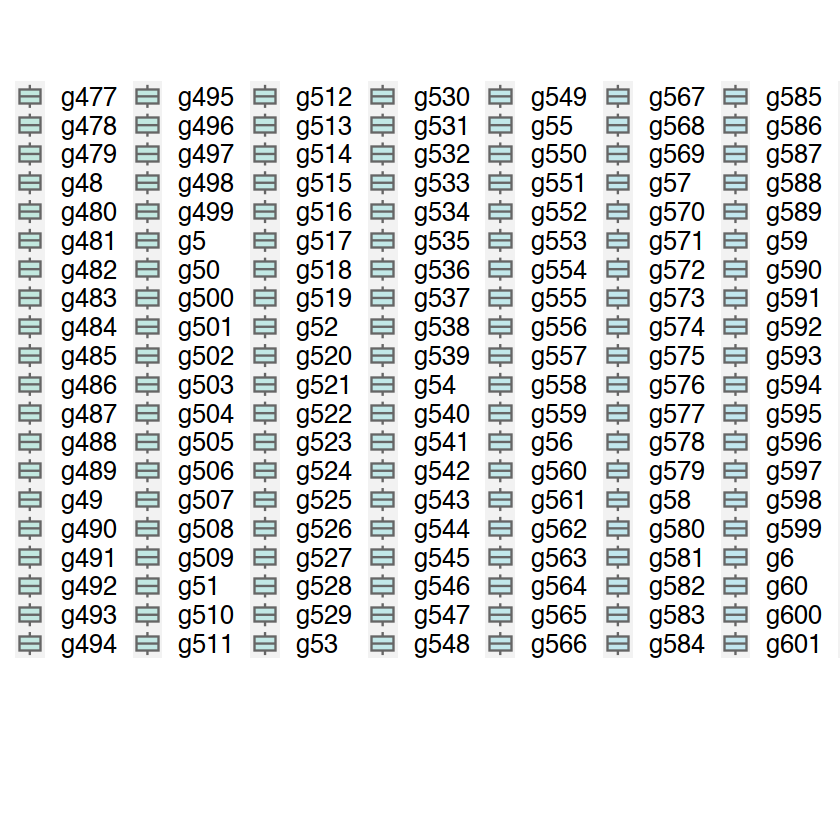

In [190]:
### b. Count the missing values per gene and visualize this result.
microarray_missing_count <- as.data.frame(t(microarray %>% summarise_all(~sum(is.na(.)))))
microarray_missing_count$gene <- rownames(microarray_missing_count)
colnames(microarray_missing_count) <- c("count", "gene")
head(microarray_missing_count)

ggplot(microarray_missing_count, aes(x=gene,y=count)) +
geom_bar(stat="identity")+
labs(x = "\nGene", y= "Count of Missing Values") +
  theme(
    plot.margin = margin(1, 1, 1, 1, "cm"),
    axis.text.x = element_text(angle = 90, color = "black", size = 1),
    axis.text.y = element_text(color = "black", size = 10),
    axis.title = element_text(size = 25),
    legend.position = "none",
    legend.title = element_text(size = 20, hjust=0),
    legend.text = element_text(size = 15),
    strip.text.x = element_text(size = 15),
    plot.title = element_text(size = 20, hjust=0.5),
    panel.spacing = unit(2, "lines"))

In [211]:
### c. Find the genes for which there are more than X% (X=10%, 20%, 50%) missing values.
microarray_missing_count_percentage <- as.data.frame(t(microarray %>% summarise_all(~mean(is.na(.))*100)))

microarray_missing_count_percentage_morethan10 <- subset(microarray_missing_count_percentage, V1>10)
rownames(microarray_missing_count_percentage_morethan10)

microarray_missing_count_percentage_morethan20 <- subset(microarray_missing_count_percentage, V1>20)
rownames(microarray_missing_count_percentage_morethan20)

microarray_missing_count_percentage_morethan50 <- subset(microarray_missing_count_percentage, V1>50)
rownames(microarray_missing_count_percentage_morethan50)

[1] "g1"   "g2"   "g3"   "g4"   "g5"   "g10"  "g11"  "g12"  "g14"  "g15" 
 [11] "g16"  "g18"  "g21"  "g22"  "g23"  "g24"  "g25"  "g26"  "g28"  "g29" 
 [21] "g35"  "g36"  "g37"  "g38"  "g39"  "g40"  "g41"  "g42"  "g44"  "g45" 
 [31] "g46"  "g47"  "g48"  "g49"  "g50"  "g51"  "g52"  "g53"  "g54"  "g55" 
 [41] "g56"  "g57"  "g58"  "g59"  "g60"  "g61"  "g62"  "g63"  "g64"  "g65" 
 [51] "g66"  "g67"  "g68"  "g69"  "g70"  "g71"  "g72"  "g73"  "g74"  "g75" 
 [61] "g76"  "g77"  "g78"  "g79"  "g80"  "g81"  "g82"  "g83"  "g84"  "g85" 
 [71] "g86"  "g87"  "g88"  "g89"  "g90"  "g91"  "g92"  "g93"  "g94"  "g95" 
 [81] "g96"  "g97"  "g98"  "g99"  "g100" "g101" "g102" "g103" "g104" "g105"
 [91] "g106" "g107" "g108" "g109" "g110" "g111" "g112" "g113" "g114" "g115"
[101] "g116" "g117" "g118" "g119" "g120" "g130" "g131" "g132" "g133" "g134"
[111] "g135" "g136" "g137" "g138" "g139" "g140" "g142" "g147" "g148" "g151"
[121] "g152" "g153" "g154" "g155" "g156" "g157" "g158" "g159" "g160" "g165"
[131] "g171" "g172" "g173" "g174" "g175" "g176" "g177" "g178" "g179" "g180"
[141] "g194" "g196" "g200" "g204" "g210" "g221" "g223" "g233" "g239" "g241"
[151] "g242" "g243" "g244" "g252" "g258" "g260" "g263" "g264" "g268" "g274"
[161] "g280" "g281" "g284" "g285" "g286" "g287" "g288" "g290" "g292" "g294"
[171] "g295" "g296" "g297" "g298" "g299" "g301" "g309" "g311" "g312" "g313"
[181] "g314" "g315" "g316" "g320" "g321" "g322" "g323" "g324" "g327" "g329"
[191] "g331" "g332" "g333" "g334" "g335" "g336" "g337" "g339" "g344" "g347"
[201] "g348" "g351" "g352" "g353" "g354" "g355" "g356" "g357" "g358" "g359"
[211] "g360" "g361" "g362" "g363" "g364" "g365" "g366" "g367" "g368" "g369"
[221] "g370" "g372" "g374" "g377" "g378" "g379" "g380" "g381" "g382" "g383"
[231] "g384" "g385" "g386" "g387" "g388" "g389" "g390" "g391" "g392" "g396"
[241] "g400" "g401" "g402" "g403" "g404" "g405" "g406" "g407" "g408" "g409"
[251] "g410" "g411" "g413" "g415" "g416" "g417" "g418" "g419" "g421" "g423"
[261] "g425" "g429" "g430" "g431" "g432" "g433" "g434" "g435" "g436" "g437"
[271] "g438" "g439" "g440" "g445" "g450" "g453" "g455" "g459" "g460" "g461"
[281] "g462" "g463" "g464" "g465" "g466" "g467" "g468" "g469" "g470" "g476"
[291] "g477" "g479" "g481" "g483" "g491" "g492" "g493" "g494" "g495" "g496"
[301] "g497" "g498" "g499" "g500" "g502" "g507" "g510" "g513" "g514" "g515"
[311] "g518" "g519" "g520" "g522" "g524" "g525" "g527" "g530" "g531" "g532"
[321] "g533" "g534" "g535" "g536" "g537" "g538" "g539" "g540" "g541" "g544"
[331] "g547" "g553" "g555" "g556" "g558" "g559" "g561" "g563" "g564" "g567"
[341] "g569" "g570" "g571" "g572" "g573" "g574" "g575" "g576" "g577" "g578"
[351] "g579" "g580" "g583" "g585" "g586" "g589" "g591" "g592" "g595" "g597"
[361] "g599" "g607" "g610" "g611" "g612" "g613" "g614" "g615" "g616" "g617"
[371] "g618" "g619" "g620" "g631" "g638" "g650" "g653" "g657" "g660" "g663"
[381] "g666" "g669" "g672" "g681" "g689" "g691" "g694" "g696" "g700" "g707"
[391] "g709" "g711" "g715" "g718" "g719" "g722" "g724" "g726" "g743" "g744"
[401] "g747" "g748" "g749" "g751" "g752" "g753" "g754" "g755" "g756" "g757"
[411] "g758" "g759" "g760" "g761" "g762" "g763" "g764" "g765" "g766" "g767"
[421] "g768" "g769" "g770" "g776" "g781" "g782" "g783" "g784" "g785" "g786"
[431] "g787" "g788" "g789" "g790" "g795" "g796" "g801" "g802" "g803" "g804"
[441] "g805" "g806" "g807" "g808" "g809" "g810" "g812" "g814" "g818" "g820"
[451] "g822" "g824" "g831" "g832" "g833" "g834" "g835" "g836" "g837" "g838"
[461] "g839" "g840" "g843" "g849" "g850" "g851" "g854" "g861" "g862" "g863"
[471] "g864" "g865" "g866" "g867" "g868" "g869" "g870" "g872" "g874" "g882"
[481] "g884" "g891" "g892" "g893" "g894" "g895" "g896" "g897" "g898" "g899"
[491] "g900" "g903" "g909" "g910" "g911" "g919" "g922" "g926" "g931" "g932"
[501] "g933" "g934" "g935" "g936" "g937" "g938" "g939" "g940" "g945" "g947"
[511] "g948" "g951" "g952" "g956" "g963" "g965" "g970" "g971" "g972" "g973"
[521] "g974" "g975" "g976" "g977" "g978" "g979" "g

[1] "g1"   "g14"  "g18"  "g21"  "g22"  "g24"  "g25"  "g26"  "g29"  "g39" 
 [11] "g40"  "g41"  "g48"  "g51"  "g52"  "g53"  "g54"  "g55"  "g56"  "g57" 
 [21] "g58"  "g59"  "g60"  "g61"  "g62"  "g63"  "g64"  "g65"  "g66"  "g67" 
 [31] "g68"  "g69"  "g70"  "g71"  "g72"  "g73"  "g74"  "g75"  "g76"  "g77" 
 [41] "g78"  "g79"  "g80"  "g81"  "g82"  "g83"  "g84"  "g85"  "g86"  "g87" 
 [51] "g88"  "g89"  "g90"  "g91"  "g92"  "g93"  "g94"  "g95"  "g96"  "g97" 
 [61] "g98"  "g99"  "g100" "g101" "g102" "g103" "g104" "g105" "g106" "g107"
 [71] "g108" "g109" "g110" "g111" "g112" "g113" "g114" "g115" "g116" "g117"
 [81] "g118" "g119" "g120" "g130" "g131" "g132" "g133" "g134" "g135" "g136"
 [91] "g137" "g138" "g139" "g140" "g142" "g147" "g148" "g151" "g152" "g153"
[101] "g154" "g155" "g156" "g157" "g158" "g159" "g160" "g165" "g171" "g172"
[111] "g173" "g174" "g175" "g176" "g177" "g178" "g179" "g180" "g196" "g200"
[121] "g204" "g210" "g233" "g252" "g260" "g290" "g297" "g301" "g321" "g329"
[131] "g332" "g333" "g334" "g335" "g344" "g351" "g352" "g353" "g354" "g355"
[141] "g356" "g357" "g358" "g359" "g360" "g361" "g362" "g363" "g364" "g365"
[151] "g366" "g367" "g368" "g369" "g370" "g379" "g381" "g382" "g383" "g384"
[161] "g385" "g386" "g387" "g388" "g389" "g390" "g391" "g396" "g400" "g401"
[171] "g402" "g403" "g404" "g405" "g406" "g407" "g408" "g409" "g410" "g415"
[181] "g417" "g418" "g431" "g432" "g433" "g434" "g435" "g436" "g437" "g438"
[191] "g439" "g440" "g445" "g450" "g455" "g461" "g462" "g463" "g464" "g465"
[201] "g466" "g467" "g468" "g469" "g470" "g476" "g491" "g492" "g493" "g494"
[211] "g495" "g496" "g497" "g498" "g499" "g500" "g510" "g513" "g515" "g518"
[221] "g519" "g520" "g522" "g527" "g531" "g532" "g533" "g534" "g535" "g536"
[231] "g537" "g538" "g539" "g540" "g544" "g547" "g558" "g561" "g569" "g570"
[241] "g571" "g572" "g573" "g574" "g575" "g576" "g577" "g578" "g579" "g580"
[251] "g583" "g585" "g586" "g591" "g599" "g611" "g612" "g613" "g614" "g615"
[261] "g616" "g617" "g618" "g619" "g620" "g650" "g657" "g663" "g669" "g689"
[271] "g691" "g694" "g744" "g751" "g752" "g753" "g754" "g755" "g756" "g757"
[281] "g758" "g759" "g760" "g761" "g762" "g763" "g764" "g765" "g766" "g767"
[291] "g768" "g769" "g770" "g781" "g782" "g783" "g784" "g785" "g786" "g787"
[301] "g788" "g789" "g790" "g801" "g802" "g803" "g804" "g805" "g806" "g807"
[311] "g808" "g809" "g810" "g814" "g831" "g832" "g833" "g834" "g835" "g836"
[321] "g837" "g838" "g839" "g840" "g849" "g850" "g851" "g854" "g861" "g862"
[331] "g863" "g864" "g865" "g866" "g867" "g868" "g869" "g870" "g872" "g891"
[341] "g892" "g893" "g894" "g895" "g896" "g897" "g898" "g899" "g900" "g910"
[351] "g919" "g926" "g931" "g932" "g933" "g934" "g935" "g936" "g937" "g938"
[361] "g939" "g940" "g947" "g951" "g970" "g971" "g972" "g973" "g974" "g975"
[371] "g976" "g977" "g978" "g979" "g980" "g985" "g989"

[1] "g18"  "g48"  "g55"  "g58"  "g60"  "g66"  "g73"  "g79"  "g83"  "g91" 
[11] "g93"  "g94"  "g99"  "g105" "g109" "g132" "g135" "g137" "g138" "g172"
[21] "g260" "g290" "g301" "g329" "g352" "g355" "g362" "g363" "g368" "g383"
[31] "g388" "g389" "g390" "g391" "g406" "g417" "g431" "g432" "g440" "g461"
[41] "g462" "g498" "g519" "g527" "g531" "g532" "g538" "g572" "g575" "g576"
[51] "g577" "g585" "g615" "g619" "g663" "g669" "g751" "g753" "g766" "g768"
[61] "g788" "g802" "g804" "g838" "g851" "g854" "g864" "g892" "g893" "g898"
[71] "g919" "g932" "g971" "g980"

In [212]:
### d. Replace the missing values by the average expression value for the particular gene. (Note: Imputing data has to be used with caution!)
microarray_NAreplaced <- microarray
for(i in 1:ncol(microarray)) {
  microarray_NAreplaced[ , i][is.na(microarray_NAreplaced[ , i])] <- mean(microarray_NAreplaced[ , i], na.rm = TRUE)
}
microarray_NAreplaced 

g1,g2,g3,g4,g5,g6,g7,g8,g9,g10,⋯,g991,g992,g993,g994,g995,g996,g997,g998,g999,g1000
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1.80200000,0.1656927,-0.1820000,1.31200000,3.49700000,0.4390000,0.7770,0.3790000,0.336,0.8770000,⋯,0.212,0.6650000,-0.5070000,0.674,0.3600000,-0.4890000,0.660,0.66100000,-1.22700000,0.30100
0.02547518,0.1656927,7.6930000,-0.06731957,0.19300000,-1.3830000,-1.3090,-0.4240000,-0.270,-0.5190000,⋯,0.515,-0.0240000,-0.1690000,2.481,0.2130000,-0.0840000,-0.658,0.05800000,-0.92300000,-0.00900
1.07900000,0.1656927,1.5560000,1.65200000,-0.01812288,0.4600000,0.7150,0.3750000,-0.138,-0.2610000,⋯,0.210,0.0670000,-0.3990000,-0.561,0.3410000,-0.3790000,0.110,0.38200000,-0.22200000,-0.15500
3.60700000,0.1656927,1.9140000,-0.06731957,1.40000000,1.1090000,2.1430,1.5710000,-0.271,-0.3090000,⋯,-0.145,0.6670000,-0.0740000,-0.459,0.7810000,-0.2230000,0.082,0.64600000,-1.67900000,-0.08000
-1.70000000,0.1656927,0.9430000,-0.06731957,-0.17000000,-0.1571338,-0.0410,-0.1771063,-0.069,1.5330000,⋯,-0.131,-0.2820000,3.0290000,-0.276,-0.1310000,-0.3300000,-0.163,-0.11700000,-1.24200000,0.13100
0.02547518,0.1656927,0.0430000,-0.06731957,0.72900000,-0.0890000,0.2090,-0.3080000,0.474,-0.6550000,⋯,0.199,-0.2280000,-0.1020000,-1.086,0.3020000,0.7000000,-1.145,-0.32000000,-0.11900000,-0.19800
0.02547518,0.1656927,-0.1230605,-0.06731957,-0.01812288,-0.1571338,-0.2625,2.0260000,-0.567,-3.0880000,⋯,-1.427,-0.1920000,0.5910000,-2.099,-0.1030000,0.4360000,-1.274,0.04997004,0.65200000,-0.05625
0.02547518,0.1656927,-0.1230605,-0.06731957,-0.01812288,-1.2970000,-0.5060,-0.2280000,0.595,-0.0630000,⋯,-0.334,-0.4090000,-0.6260000,-0.022,0.7290000,0.2080000,-0.330,-0.17400000,-0.14500000,1.06000
0.02547518,1.8310000,-0.1230605,1.59600000,-0.01812288,2.6560000,4.8310,0.6770000,-1.678,0.0160000,⋯,-0.239,-0.9710000,-1.7810000,-0.891,-1.0620000,-1.9910000,-0.304,-0.25800000,-4.51700000,-0.55100


[1] "We can see that the uptake of Quebec groups is higher than that of Mississippi. Similarly the nonchilled plants have higher uptake in comparison with the chilled ones"


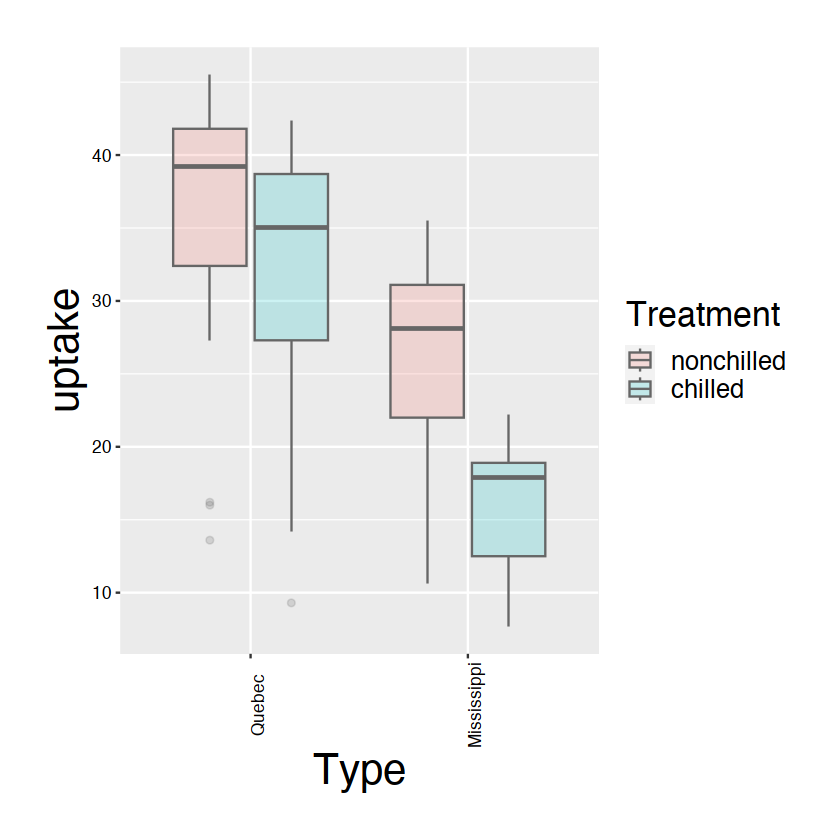

In [217]:
## 3. Visualize the data in the CO2 dataset in a way that gives you a deeper understanding of the data. What do you see?
ggplot(CO2, aes(x=Type, y=uptake, fill=Treatment)) +
    geom_boxplot(colour="grey40", alpha=0.2) +
  theme(
    plot.margin = margin(1, 1, 1, 1, "cm"),
    axis.text.x = element_text(angle = 90, color = "black", size = 10),
    axis.text.y = element_text(color = "black", size = 10),
    axis.title = element_text(size = 25),
    legend.position = "right",
    legend.title = element_text(size = 20, hjust=0),
    legend.text = element_text(size = 15),
    strip.text.x = element_text(size = 15),
    plot.title = element_text(size = 20, hjust=0.5),
    panel.spacing = unit(2, "lines")) 
print("We can see that the uptake of Quebec groups is higher than that of Mississippi. Similarly the nonchilled plants have higher uptake in comparison with the chilled ones")

In [220]:
# Task 7
## 1. Install the Tidybiology package,
devtools::install_github("hirscheylab/tidybiology")
library(tidybiology)

Skipping install of 'tidybiology' from a github remote, the SHA1 (d03a810a) has not changed since last install.
  Use `force = TRUE` to force installation



In [230]:
### a. Extract summary statistics (mean, median and maximum) for the following variables from the ‘chromosome’ data: variations, protein coding genes, and miRNAs.
data("chromosome")
summary(chromosome[,c("variations", "protein_codinggenes", "mi_rna")])

   variations       protein_codinggenes     mi_rna      
 Min.   :  211643   Min.   :  71.0      Min.   : 15.00  
 1st Qu.: 4395298   1st Qu.: 595.8      1st Qu.: 55.75  
 Median : 6172346   Median : 836.0      Median : 75.00  
 Mean   : 6484572   Mean   : 850.0      Mean   : 73.17  
 3rd Qu.: 8742592   3rd Qu.:1055.5      3rd Qu.: 92.00  
 Max.   :12945965   Max.   :2058.0      Max.   :134.00  

In [249]:
type(chromosome$length_mm)

[1] "double"

id,length_mm,basepairs,variations,protein_codinggenes,pseudo_genes,totallongnc_rna,totalsmallnc_rna,mi_rna,r_rna,sn_rna,sno_rna,miscnc_rna,centromereposition_mbp
<fct>,<int>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>
1,248956422,248956422,12151146,2058,1220,1200,496,134,66,221,145,192,125.0
2,242193529,242193529,12945965,1309,1023,1037,375,115,40,161,117,176,93.3
3,198295559,198295559,10638715,1078,763,711,298,99,29,138,87,134,91.0
4,190214555,190214555,10165685,752,727,657,228,92,24,120,56,104,50.4
5,181538259,181538259,9519995,876,721,844,235,83,25,106,61,119,48.4
6,170805979,170805979,9130476,1048,801,639,234,81,26,111,73,105,61.0


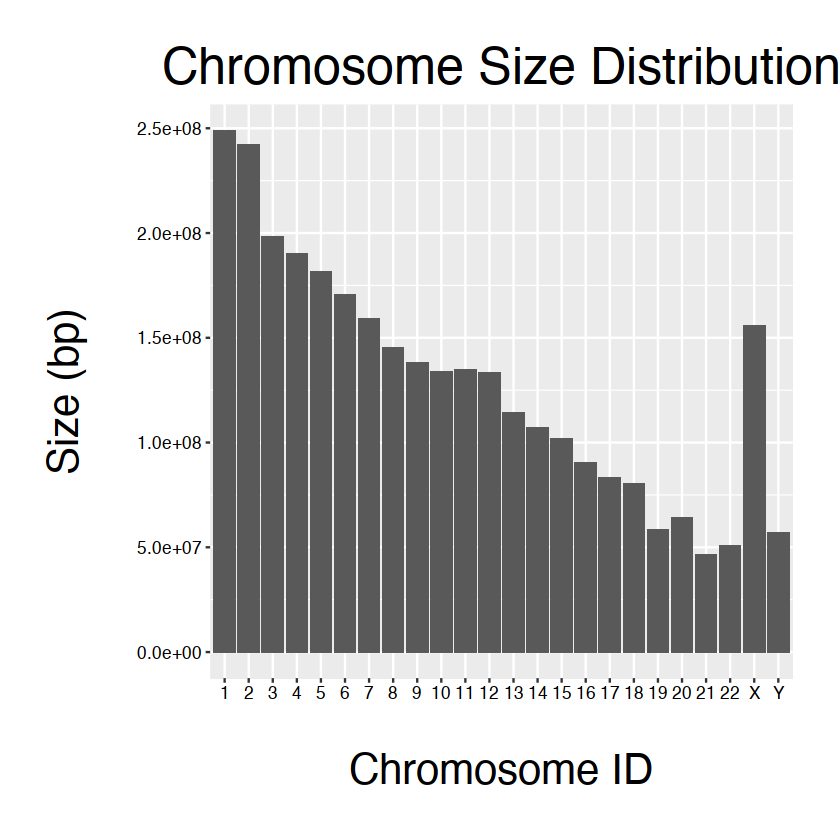

In [274]:
### b. How does the chromosome size distribute? Plot a graph that helps to visualize this by using ggplot2 package functions.
head(chromosome)
chromosome$basepairs <- as.integer(chromosome$basepairs)
ggplot(chromosome, aes(x=id, y=basepairs)) +
geom_bar(stat="identity")  +
theme(
    plot.margin = margin(1, 1, 1, 1, "cm"),
    axis.text.x = element_text(color = "black", size = 10),
    axis.text.y = element_text(color = "black", size = 10),
    axis.title = element_text(size = 25),
    legend.position = "right",
    legend.title = element_text(size = 20, hjust=0),
    legend.text = element_text(size = 15),
    strip.text.x = element_text(size = 15),
    plot.title = element_text(size = 30, hjust=0.5),
    panel.spacing = unit(2, "lines")) +
labs(x = "\nChromosome ID", y= "Size (bp)\n", title = "Chromosome Size Distribution")


`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


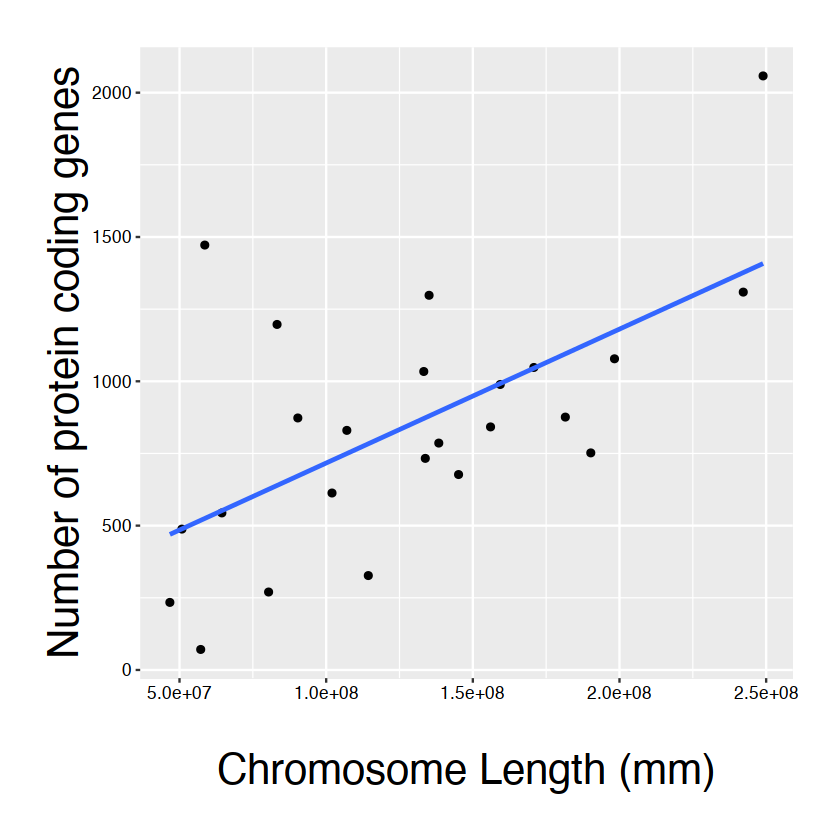

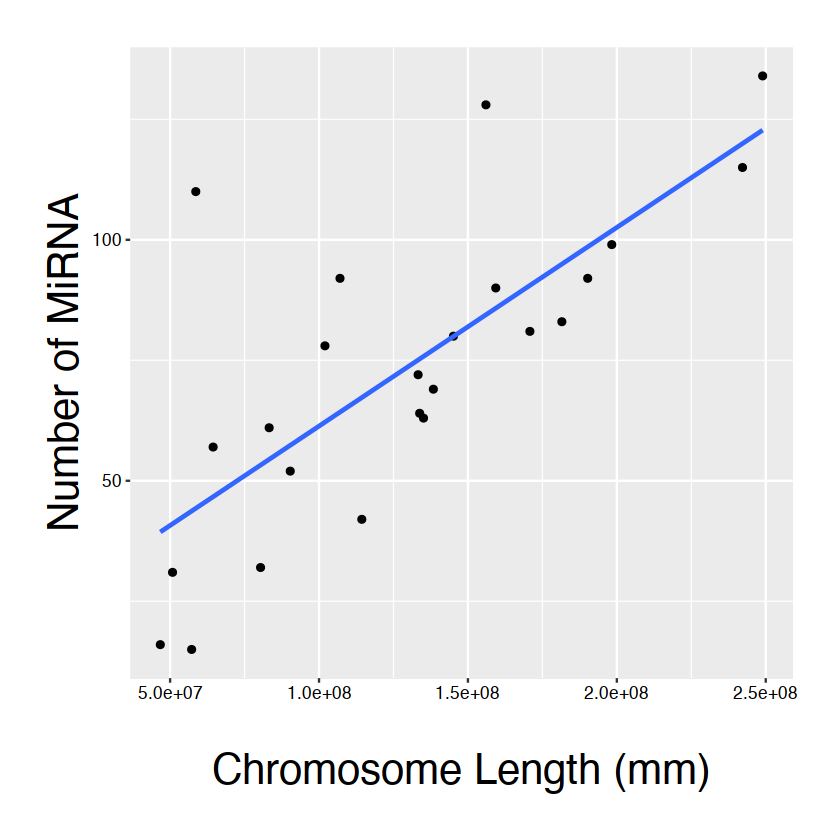

In [278]:
### c. Does the number of protein coding genes or miRNAs correlate with the length of the chromosome? Make two separate plots to visualize these relationships.
ggplot(chromosome, aes(x=length_mm, y=protein_codinggenes)) +
geom_point()+
geom_smooth(method=lm, se=FALSE)  +
  theme(
    plot.margin = margin(1, 1, 1, 1, "cm"),
    axis.text.x = element_text(color = "black", size = 10),
    axis.text.y = element_text(color = "black", size = 10),
    axis.title = element_text(size = 25),
    legend.position = "right",
    legend.title = element_text(size = 20, hjust=0),
    legend.text = element_text(size = 15),
    strip.text.x = element_text(size = 15),
    plot.title = element_text(size = 20, hjust=0.5),
    panel.spacing = unit(2, "lines")) +
labs(x = "\nChromosome Length (mm)", y= "Number of protein coding genes")

ggplot(chromosome, aes(x=length_mm, y=mi_rna)) +
geom_point()+
geom_smooth(method=lm, se=FALSE)  +
  theme(
    plot.margin = margin(1, 1, 1, 1, "cm"),
    axis.text.x = element_text(color = "black", size = 10),
    axis.text.y = element_text(color = "black", size = 10),
    axis.title = element_text(size = 25),
    legend.position = "right",
    legend.title = element_text(size = 20, hjust=0),
    legend.text = element_text(size = 15),
    strip.text.x = element_text(size = 15),
    plot.title = element_text(size = 20, hjust=0.5),
    panel.spacing = unit(2, "lines")) +
labs(x = "\nChromosome Length (mm)", y= "Number of MiRNA")

     length             mass        
 Min.   :    2.0   Min.   :    260  
 1st Qu.:  251.0   1st Qu.:  27940  
 Median :  414.0   Median :  46140  
 Mean   :  557.2   Mean   :  62061  
 3rd Qu.:  669.0   3rd Qu.:  74755  
 Max.   :34350.0   Max.   :3816030  

`geom_smooth()` using formula = 'y ~ x'


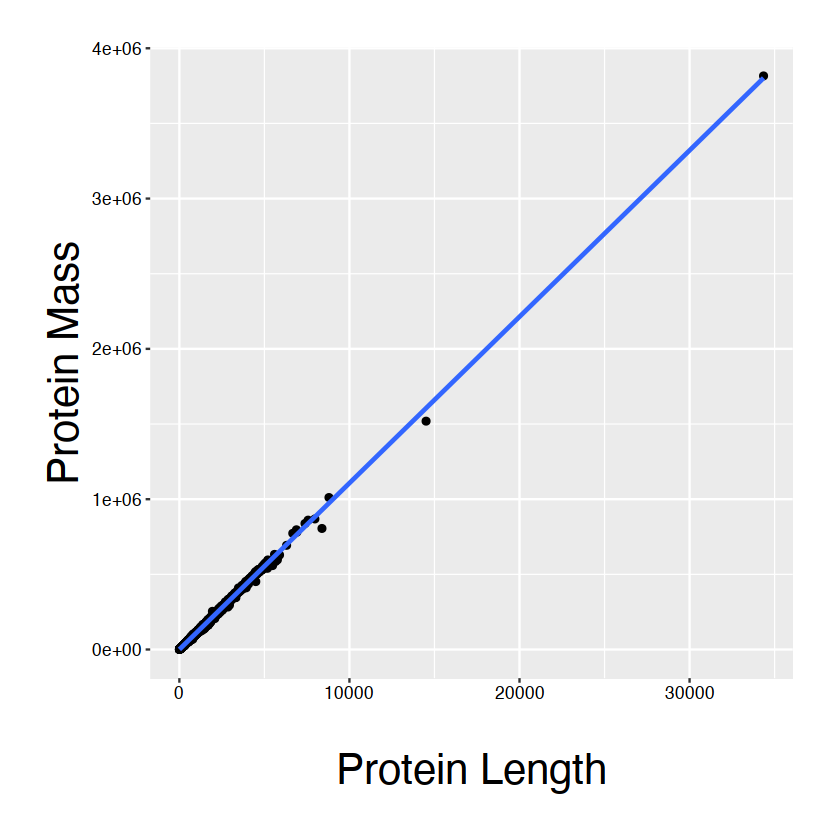

In [282]:
### d. Calculate the same summary statistics for the ‘proteins’ data variables length and mass. Create a meaningful visualization of the relationship between these two variables by utilizing the ggplot2 package functions. Play with the colors, theme- and other visualization parameters to create a plot that pleases you.
data("proteins")
summary(proteins[,c("length", "mass")])

ggplot(proteins, aes(x=length, y=mass)) +
geom_point()+
geom_smooth(method=lm, se=FALSE)  +
  theme(
    plot.margin = margin(1, 1, 1, 1, "cm"),
    axis.text.x = element_text(color = "black", size = 10),
    axis.text.y = element_text(color = "black", size = 10),
    axis.title = element_text(size = 25),
    legend.position = "right",
    legend.title = element_text(size = 20, hjust=0),
    legend.text = element_text(size = 15),
    strip.text.x = element_text(size = 15),
    plot.title = element_text(size = 20, hjust=0.5),
    panel.spacing = unit(2, "lines")) +
labs(x = "\nProtein Length", y= "Protein Mass")
